In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from pylab import *


import time
import tensorflow as tf
tf.set_random_seed(1)

import keras
import sys

/home/fernanda/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
#downlad mnist data
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
del [x_test,y_test]

In [7]:
#loop over each class label and sample 100 random images over each label and save the idx to subset
np.random.seed(seed=486)
idx=np.empty(0,dtype="int8")
for i in range(0,len(np.unique(y_train))):
    idx=np.append(idx,np.random.choice(np.where((y_train[0:len(y_train)])==i)[0],100,replace=False))

x_train= x_train[idx]
y_train= y_train[idx]

In [8]:
print(x_train.shape)
print(y_train.shape)
print(np.unique(y_train,return_counts=True))

(1000, 28, 28)
(1000,)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100]))


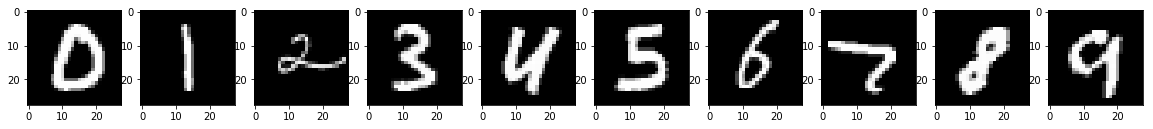

In [9]:
#sample image of each label
plt.figure(figsize=(20,20))
for i in range(0,len(np.unique(y_train))):
    rmd=np.random.choice(np.where(y_train==i)[0],1)
    plt.subplot(1,10,i+1)
    img=x_train[rmd].reshape(1,28,28,1)
    plt.imshow(img[0,:,:,0],cmap="gray")

# t-sne on pixel values MNIST

In [10]:
# takes some time
from sklearn.manifold import TSNE

m = TSNE(n_components=2, random_state=0)
tsne = m.fit_transform(x_train.reshape((len(x_train),28*28)))

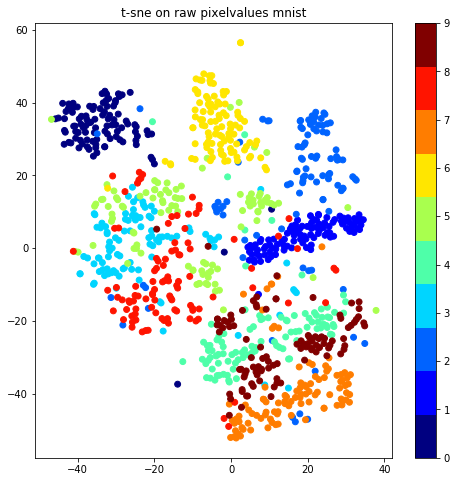

In [13]:
plt.figure(figsize=(8,8))
cmap = cm.get_cmap('jet', 10)
plt.scatter(x=tsne[:,0],y=tsne[:,1],c=y_train,s=35,cmap=cmap)
plt.title("t-sne on raw pixelvalues mnist")
plt.colorbar()
plt.show()